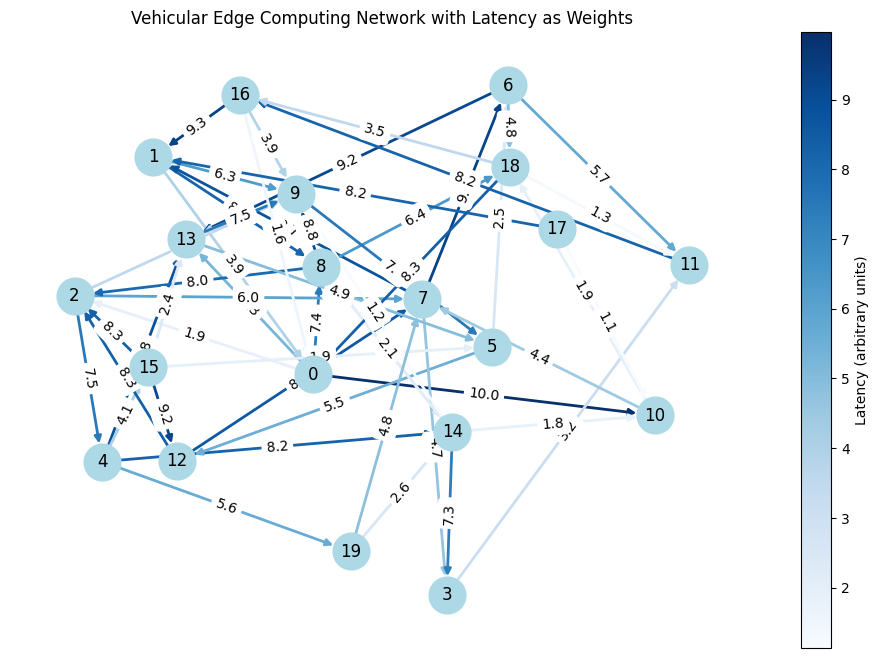

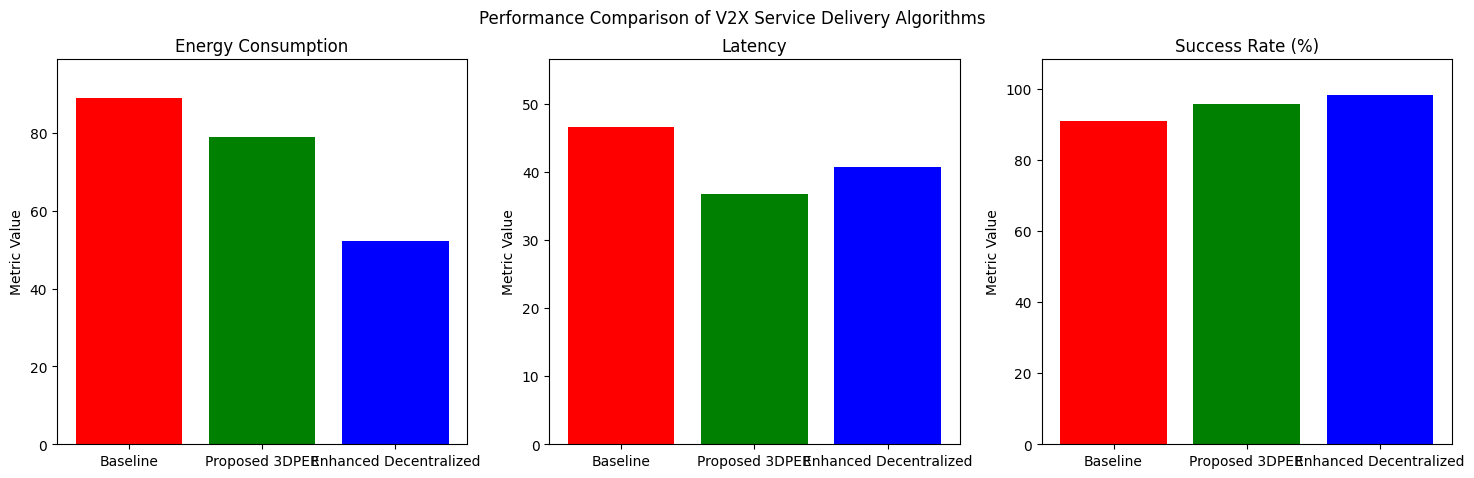

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict
import matplotlib.colors as mcolors

# Step 1: Create a graph to represent the vehicular edge computing network
G = nx.erdos_renyi_graph(20, 0.15, seed=42, directed=True)
pos = nx.spring_layout(G)

# Add edge weights to simulate latency or energy consumption in the network
for (u, v) in G.edges():
    G.edges[u, v]['weight'] = np.random.uniform(1, 10)

# Step 2: Visualize the graph with edge weights
fig, ax = plt.subplots(figsize=(12, 8)) # Create a figure and an axes object

edges, weights = zip(*nx.get_edge_attributes(G, 'weight').items())
# Normalize the weights to map them to a colormap
norm = mcolors.Normalize(vmin=min(weights), vmax=max(weights))
edge_cmap = plt.cm.Blues
# Draw the network, specifying the axes object
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color=weights, width=2, edge_cmap=edge_cmap, node_size=700, ax=ax)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d['weight']:.1f}" for u, v, d in G.edges(data=True)}, ax=ax) # Specify ax here too
plt.title("Vehicular Edge Computing Network with Latency as Weights")
# Create a colorbar with proper colormap
sm = plt.cm.ScalarMappable(cmap=edge_cmap, norm=norm)
sm.set_array([])  # Empty array for colorbar to work
# Pass the axes object to colorbar
plt.colorbar(sm, label='Latency (arbitrary units)', ax=ax)
plt.show()

# Step 3: Simulate performance metrics for comparison
# ... (rest of the code remains the same)
# Step 3: Simulate performance metrics for comparison
metrics = {
    'Energy Consumption': [np.random.uniform(50, 100) for _ in range(3)],
    'Latency': [np.random.uniform(20, 50) for _ in range(3)],
    'Success Rate (%)': [np.random.uniform(85, 100) for _ in range(3)]
}

labels = ['Baseline', 'Proposed 3DPER', 'Enhanced Decentralized']

# Step 4: Plot bar charts to compare the performance metrics
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
for i, (metric, values) in enumerate(metrics.items()):
    ax[i].bar(labels, values, color=['red', 'green', 'blue'])
    ax[i].set_title(metric)
    ax[i].set_ylim(0, max(values) + 10)
    ax[i].set_ylabel('Metric Value')

plt.suptitle("Performance Comparison of V2X Service Delivery Algorithms")
plt.show()


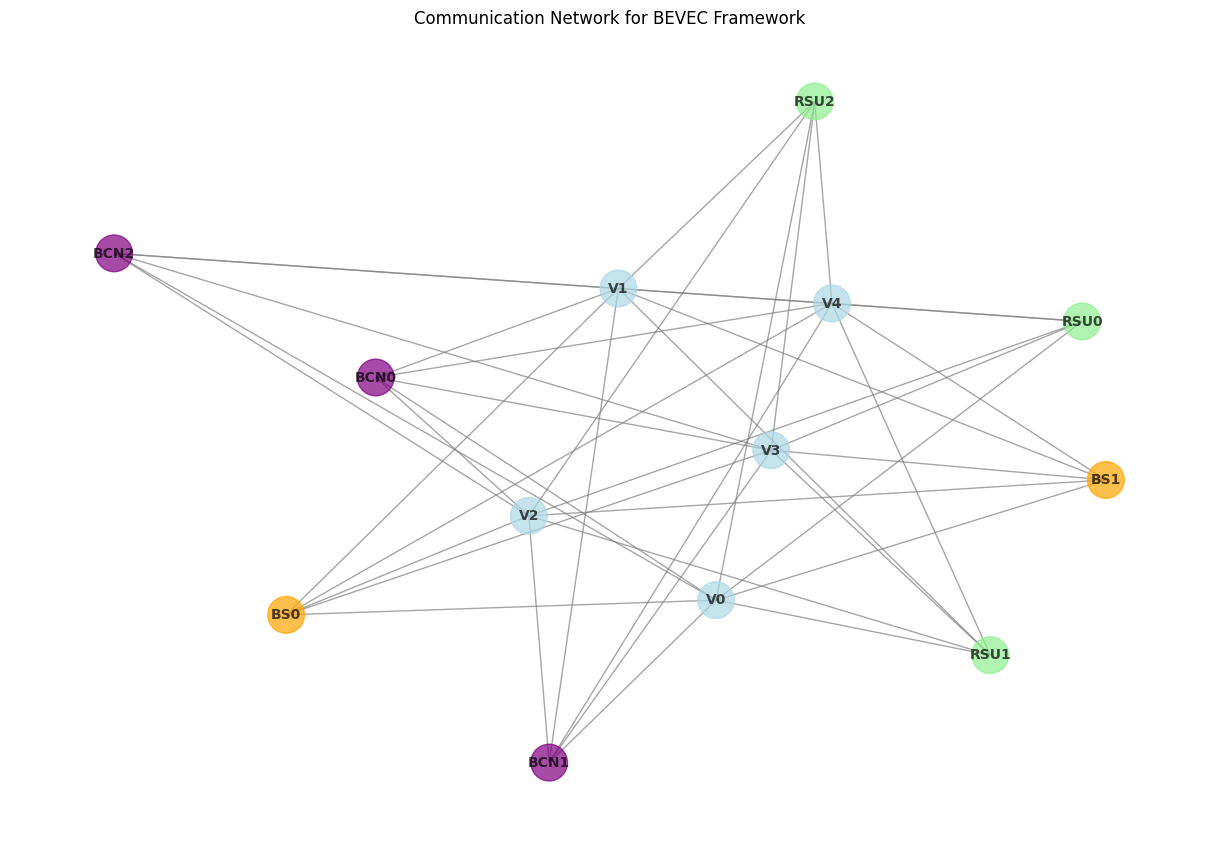

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import random

class Vehicle:
    def __init__(self, id, role='vehicle'): # Added a default value for 'role'
        self.id = id
        self.role = role

class RSU:
    def __init__(self, id):
        self.id = id

class BS:
    def __init__(self, id):
        self.id = id

class BlockchainNode:
    def __init__(self, id):
        self.id = id

# Define the network of Vehicles, RSUs, BSs, and Blockchain nodes
vehicles = [Vehicle(i) for i in range(5)]  # 5 Vehicles
rsus = [RSU(i) for i in range(3)]  # 3 RSUs
bss = [BS(i) for i in range(2)]  # 2 Base Stations
blockchain_nodes = [BlockchainNode(i) for i in range(3)]  # 3 Blockchain Nodes

# Create a graph
G = nx.Graph()

# Add nodes for each entity
for vehicle in vehicles:
    G.add_node(f"V{vehicle.id}", type='vehicle')
for rsu in rsus:
    G.add_node(f"RSU{rsu.id}", type='rsu')
for bs in bss:
    G.add_node(f"BS{bs.id}", type='bs')
for blockchain_node in blockchain_nodes:
    G.add_node(f"BCN{blockchain_node.id}", type='blockchain')

# Add edges for communication between entities (randomly for this example)
for vehicle in vehicles:
    for rsu in rsus:
        G.add_edge(f"V{vehicle.id}", f"RSU{rsu.id}", weight=random.uniform(1, 10))
    for bs in bss:
        G.add_edge(f"V{vehicle.id}", f"BS{bs.id}", weight=random.uniform(1, 10))
    for blockchain_node in blockchain_nodes:
        G.add_edge(f"V{vehicle.id}", f"BCN{blockchain_node.id}", weight=random.uniform(1, 10))

# Visualize the network graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
node_colors = ['lightblue' if G.nodes[node]['type'] == 'vehicle' else 'lightgreen' if G.nodes[node]['type'] == 'rsu' else 'orange' if G.nodes[node]['type'] == 'bs' else 'purple' for node in G.nodes]
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=700, font_size=10, font_weight='bold', edge_color='gray', width=1, alpha=0.7)
plt.title("Communication Network for BEVEC Framework")
plt.show()


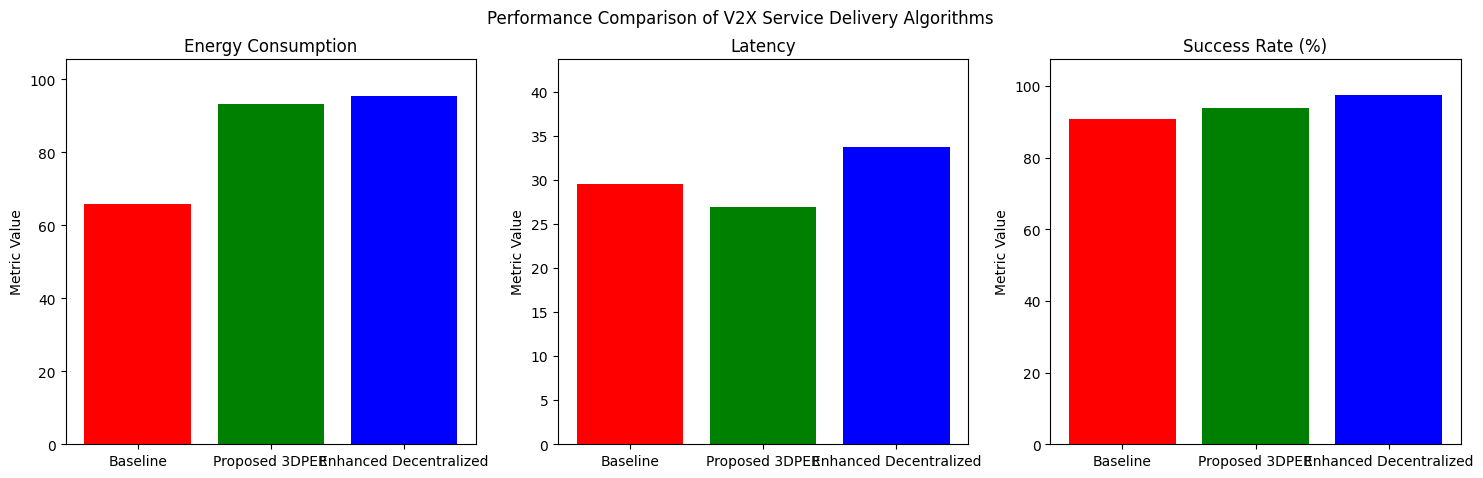

In [ ]:
# Example performance metrics for different configurations (Baseline, Proposed 3DPER, Enhanced Decentralized)
metrics = {
    'Energy Consumption': [np.random.uniform(50, 100) for _ in range(3)],
    'Latency': [np.random.uniform(20, 50) for _ in range(3)],
    'Success Rate (%)': [np.random.uniform(85, 100) for _ in range(3)]
}

labels = ['Baseline', 'Proposed 3DPER', 'Enhanced Decentralized']

# Plot bar charts to compare performance metrics
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

for i, (metric, values) in enumerate(metrics.items()):
    ax[i].bar(labels, values, color=['red', 'green', 'blue'])
    ax[i].set_title(metric)
    ax[i].set_ylim(0, max(values) + 10)
    ax[i].set_ylabel('Metric Value')

plt.suptitle("Performance Comparison of V2X Service Delivery Algorithms")
plt.show()


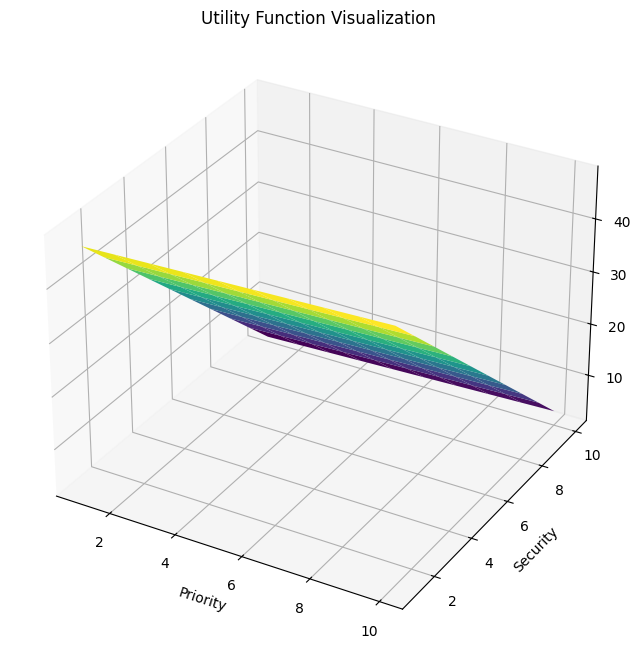

In [ ]:
# Example of utility function evaluation for different values of energy, message priority, and security
energy_values = np.linspace(10, 100, 10)  # Energy values from 10 to 100
priority_values = np.linspace(1, 10, 10)  # Priority values from 1 to 10
security_values = np.linspace(1, 10, 10)  # Security values from 1 to 10

utility_values = np.zeros((len(energy_values), len(priority_values), len(security_values)))

# Calculate the utility for each combination of energy, priority, and security
for i, energy in enumerate(energy_values):
    for j, priority in enumerate(priority_values):
        for k, security in enumerate(security_values):
            utility_values[i, j, k] = calculate_utility(energy, priority, security)

# Visualize the utility as a 3D surface plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting
X, Y = np.meshgrid(priority_values, security_values)
Z = utility_values[:, 5, :]  # Use a fixed energy value for visualization

ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('Priority')
ax.set_ylabel('Security')
ax.set_zlabel('Utility')
ax.set_title('Utility Function Visualization')

plt.show()


Delegates selected: [1, 0, 2]


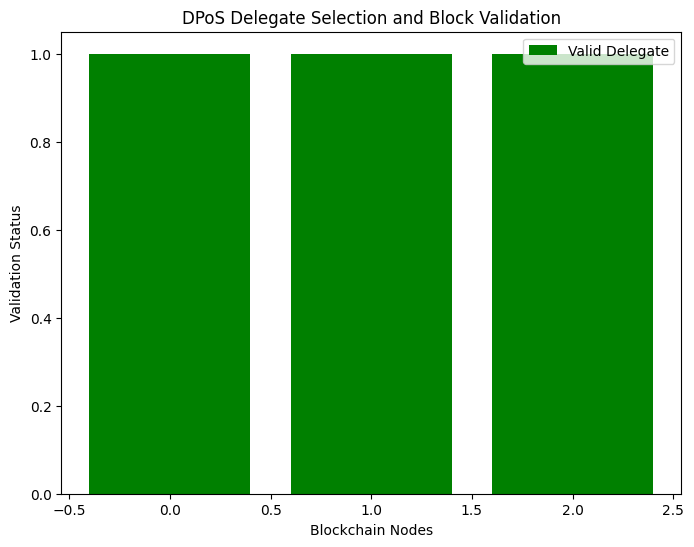

In [ ]:
# Example for DPoS Consensus Visualization
dp = DPoSConsensus(nodes=blockchain_nodes)

# Select delegates
dp.select_delegates()

# Create a simple plot to show the selection of delegates and validation process
selected_delegates = [node.id for node in dp.delegates]

# Plot a bar chart for delegate validation process
plt.figure(figsize=(8, 6))
plt.bar(selected_delegates, [1, 1, 1], color='green', label='Valid Delegate')
plt.title("DPoS Delegate Selection and Block Validation")
plt.xlabel("Blockchain Nodes")
plt.ylabel("Validation Status")
plt.legend()
plt.show()


Vehicle 0 sent message to EdgeServer 2: Message from Vehicle 0 with latency 6ms
Vehicle 1 sent message to EdgeServer 1: Message from Vehicle 1 with latency 9ms
Vehicle 2 sent message to EdgeServer 1: Message from Vehicle 2 with latency 9ms
Vehicle 3 sent message to EdgeServer 1: Message from Vehicle 3 with latency 8ms
Vehicle 4 sent message to EdgeServer 1: Message from Vehicle 4 with latency 3ms


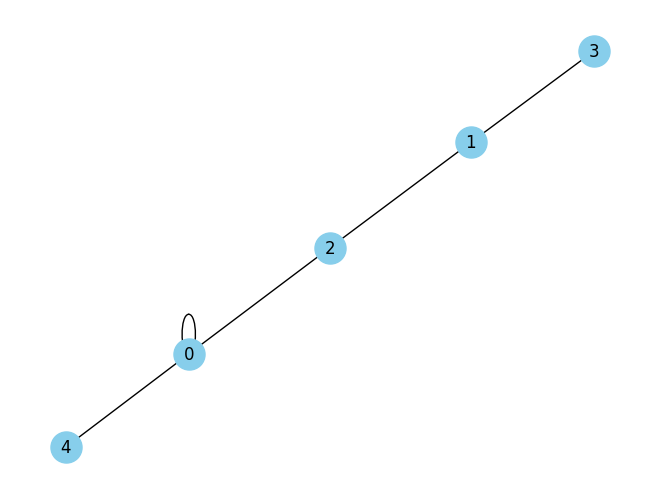

In [ ]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import hashlib
import time

class Vehicle:
    def __init__(self, id, role):
        self.id = id
        self.role = role  # 'requester' or 'provider'
        self.latency = random.randint(1, 10)  # Simulating latency (in ms)

class EdgeServer:
    def __init__(self, id):
        self.id = id
        self.transaction_history = []
        self.blockchain = []

    def process_message(self, vehicle, message):
        # Simulating message processing with latency
        time.sleep(vehicle.latency * 0.1)
        self.transaction_history.append(message)
        self.blockchain.append(self.create_block(message))

    def create_block(self, message):
        # Simple blockchain block (hashing the message)
        block = hashlib.sha256(message.encode()).hexdigest()
        return block

class V2XNetwork:
    def __init__(self, num_vehicles, num_edge_servers):
        self.vehicles = [Vehicle(i, random.choice(['requester', 'provider'])) for i in range(num_vehicles)]
        self.edge_servers = [EdgeServer(i) for i in range(num_edge_servers)]
        self.graph = nx.Graph()  # Creating a graph for visualization

    def create_graph(self):
        for vehicle in self.vehicles:
            self.graph.add_node(vehicle.id, type='vehicle', role=vehicle.role)
        for server in self.edge_servers:
            self.graph.add_node(server.id, type='edge_server')

        # Random connections between vehicles and edge servers (edges)
        for vehicle in self.vehicles:
            edge_server = random.choice(self.edge_servers)
            self.graph.add_edge(vehicle.id, edge_server.id)

    def send_message(self, vehicle, edge_server, message):
        edge_server.process_message(vehicle, message)
        print(f"Vehicle {vehicle.id} sent message to EdgeServer {edge_server.id}: {message}")

    def visualize_network(self):
        # Visualizing the V2X network with vehicles and edge servers
        pos = nx.spring_layout(self.graph)
        nx.draw(self.graph, pos, with_labels=True, node_size=500, node_color='skyblue')
        plt.show()

# Create a V2X network simulation
network = V2XNetwork(num_vehicles=5, num_edge_servers=3)
network.create_graph()

# Simulate message sending
for vehicle in network.vehicles:
    message = f"Message from Vehicle {vehicle.id} with latency {vehicle.latency}ms"
    edge_server = random.choice(network.edge_servers)
    network.send_message(vehicle, edge_server, message)

# Visualize the network
network.visualize_network()


In [ ]:
class PriorityMessage:
    def __init__(self, content, max_latency, priority_level):
        self.content = content
        self.max_latency = max_latency
        self.priority_level = priority_level  # 1 = High, 2 = Medium, 3 = Low

    def is_delayed(self, latency):
        return latency > self.max_latency

# Simulate high, medium, and low priority messages
messages = [
    PriorityMessage("Critical message from Vehicle 1", 5, 1),
    PriorityMessage("Information message from Vehicle 2", 10, 2),
    PriorityMessage("Non-critical message from Vehicle 3", 15, 3),
]

# Simulating message sending and latency checking
for vehicle in network.vehicles:
    for message in messages:
        if vehicle.latency <= message.max_latency:
            print(f"Vehicle {vehicle.id} sent {message.content} with priority {message.priority_level}")
        else:
            print(f"Vehicle {vehicle.id} delayed message: {message.content} (Latency: {vehicle.latency}ms)")


Vehicle 0 delayed message: Critical message from Vehicle 1 (Latency: 6ms)
Vehicle 0 sent Information message from Vehicle 2 with priority 2
Vehicle 0 sent Non-critical message from Vehicle 3 with priority 3
Vehicle 1 delayed message: Critical message from Vehicle 1 (Latency: 9ms)
Vehicle 1 sent Information message from Vehicle 2 with priority 2
Vehicle 1 sent Non-critical message from Vehicle 3 with priority 3
Vehicle 2 delayed message: Critical message from Vehicle 1 (Latency: 9ms)
Vehicle 2 sent Information message from Vehicle 2 with priority 2
Vehicle 2 sent Non-critical message from Vehicle 3 with priority 3
Vehicle 3 delayed message: Critical message from Vehicle 1 (Latency: 8ms)
Vehicle 3 sent Information message from Vehicle 2 with priority 2
Vehicle 3 sent Non-critical message from Vehicle 3 with priority 3
Vehicle 4 sent Critical message from Vehicle 1 with priority 1
Vehicle 4 sent Information message from Vehicle 2 with priority 2
Vehicle 4 sent Non-critical message from Ve

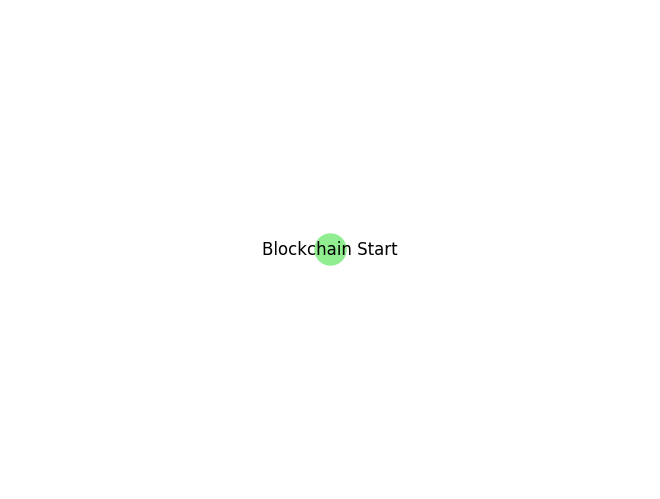

In [ ]:
# Visualizing Blockchain Transactions (Block Nodes)
def visualize_blockchain_transactions(edge_server):
    G = nx.Graph()
    G.add_node("Blockchain Start")

    for idx, block in enumerate(edge_server.blockchain):
        G.add_node(f"Block {idx+1}", block=block)
        G.add_edge("Blockchain Start", f"Block {idx+1}")

    pos = nx.spring_layout(G)
    labels = nx.get_node_attributes(G, 'block')
    nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightgreen')
    nx.draw_networkx_labels(G, pos, labels)
    plt.show()

# Visualize blockchain transaction history for the first edge server
visualize_blockchain_transactions(network.edge_servers[0])
